In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import matplotlib.pyplot as plt
import os
import PIL
import tensorflow as tf
import keras
from keras import backend as K
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import cv2

In [3]:
print(tf.__version__)


2.3.1


### Data Directory:

In [4]:
train_directory = 'Data/chest_xray/chest_xray/train'
test_directory = 'Data/chest_xray/chest_xray/test'
val_directory = 'Data/chest_xray/chest_xray/val'

In [5]:
os.listdir('Data/chest_xray/chest_xray/train/NORMAL')

['NORMAL2-IM-0927-0001.jpeg',
 'NORMAL2-IM-1056-0001.jpeg',
 'IM-0427-0001.jpeg',
 'NORMAL2-IM-1260-0001.jpeg',
 'IM-0656-0001-0001.jpeg',
 'IM-0561-0001.jpeg',
 'NORMAL2-IM-1110-0001.jpeg',
 'IM-0757-0001.jpeg',
 'NORMAL2-IM-1326-0001.jpeg',
 'NORMAL2-IM-0736-0001.jpeg',
 'NORMAL2-IM-0500-0001.jpeg',
 'NORMAL2-IM-0393-0001.jpeg',
 'NORMAL2-IM-0994-0001.jpeg',
 'IM-0207-0001.jpeg',
 'IM-0494-0001.jpeg',
 'IM-0177-0001.jpeg',
 'IM-0388-0001.jpeg',
 'IM-0341-0001.jpeg',
 'IM-0355-0001.jpeg',
 'IM-0449-0001.jpeg',
 'IM-0480-0001.jpeg',
 'NORMAL2-IM-1038-0001.jpeg',
 'NORMAL2-IM-1348-0001.jpeg',
 'IM-0739-0001.jpeg',
 'IM-0213-0001.jpeg',
 'NORMAL2-IM-0452-0001.jpeg',
 'NORMAL2-IM-0980-0001.jpeg',
 'NORMAL2-IM-0949-0001.jpeg',
 'NORMAL2-IM-0664-0001.jpeg',
 'NORMAL2-IM-1332-0001.jpeg',
 'IM-0269-0001.jpeg',
 'NORMAL2-IM-1104-0001.jpeg',
 'IM-0575-0001.jpeg',
 'IM-0605-0001.jpeg',
 'NORMAL2-IM-1274-0001.jpeg',
 'IM-0433-0001.jpeg',
 'IM-0119-0001.jpeg',
 'NORMAL2-IM-0875-0001.jpeg',
 'NORMA

In [10]:
print('training normal:', len(os.listdir('Data/chest_xray/chest_xray/train/NORMAL')), 'training pneumonia:', 
      len(os.listdir('Data/chest_xray/chest_xray/train/PNEUMONIA')))

training normal: 1342 training pneumonia: 3876


We have in our training set 1342 xrays of patients who do not have pneumonia and 3876 xrays who do have pneumonia

In [13]:
print('test normal:', len(os.listdir('Data/chest_xray/chest_xray/test/NORMAL')), 'test pneumonia:', 
      len(os.listdir('Data/chest_xray/chest_xray/test/PNEUMONIA')))

training normal: 234 training pneumonia: 390


In [6]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import numpy as np
import os

# Directory path
train_data_dir = 'CellData/chest_xray/train'
test_data_dir = 'CellData/chest_xray/test'

# Get all the data in the directory data/validation (500 images), and reshape them
test_generator = ImageDataGenerator().flow_from_directory(
        test_data_dir, 
        target_size=(256, 256), batch_size=624)

# Get all the data in the directory data/train (500 images), and reshape them
train_generator = ImageDataGenerator().flow_from_directory(
        train_data_dir, 
        target_size=(256, 256), batch_size=5232)

# Create the datasets
train_images, train_labels = next(train_generator)
test_images, test_labels = next(test_generator)

Found 624 images belonging to 2 classes.
Found 5232 images belonging to 2 classes.


In [12]:
## NORMAL GENERATOR FOR TRAINING SET
train_normal_dir = 'Data/chest_xray/chest_xray/train'
train_pneumonia_dir = 'Data/chest_xray/chest_xray/train'
train_normal_generator = ImageDataGenerator().flow_from_directory(
        train_normal_dir, 
        target_size=(256, 256))

# Get all the data in the directory data/train (500 images), and reshape them
train_pneumonia_generator = ImageDataGenerator().flow_from_directory(
        train_pneumonia_dir, 
        target_size=(256, 256))


Found 5216 images belonging to 2 classes.
Found 5216 images belonging to 2 classes.


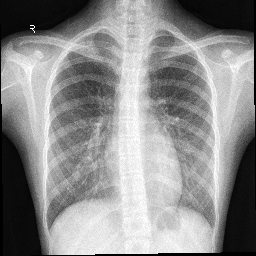

In [7]:
array_to_img(train_images[10])


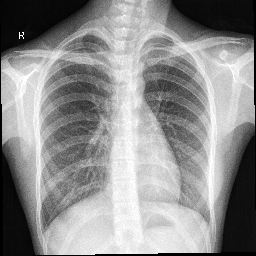

In [8]:
array_to_img(test_images[10])


In [9]:
print(np.shape(train_images))
print(np.shape(train_labels))
print(np.shape(test_images))
print(np.shape(test_labels))

(5232, 256, 256, 3)
(5232, 2)
(624, 256, 256, 3)
(624, 2)


## Data Augmentation:

Function to flip and mirror individual image

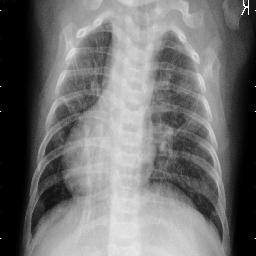

In [28]:
array_to_img(tf.image.adjust_brightness(flipped, delta=0.3))

In [10]:
def flip_img(img):
    return tf.image.flip_left_right(img)

In [11]:
def add_flipped_to_train_set(train_images):
    for img in train_images:
        print(flip_img(img))


SyntaxError: invalid syntax (<ipython-input-11-5b5ddff45a5b>, line 4)

In [15]:
add_flipped_to_train_set(train_images)

NameError: name 'add_flipped_to_train_set' is not defined

In [16]:
train_generator_aug = ImageDataGenerator(rescale = 1./255,
                                        rotation_range=25,
                                        zoom_range=0.25,
                                        brightness_range=[0.75, 1.25]).flow_from_directory(train_directory,
                                                                          target_size = (256,256), 
                                                                          color_mode='grayscale',
                                                                          class_mode='binary')
train_images, train_labels = next(train_generator_aug)


Found 5216 images belonging to 2 classes.


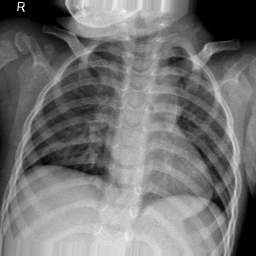

In [42]:
array_to_img(train_images[14])

In [26]:
flipped = tf.image.flip_left_right(train_images[1])


In [41]:
train_labels[14]

0.0

In [18]:
train_images[10], len(flipped)

(array([[[ 8.,  8.,  8.],
         [ 8.,  8.,  8.],
         [11., 11., 11.],
         ...,
         [12., 12., 12.],
         [ 0.,  0.,  0.],
         [ 0.,  0.,  0.]],
 
        [[ 9.,  9.,  9.],
         [ 8.,  8.,  8.],
         [ 9.,  9.,  9.],
         ...,
         [14., 14., 14.],
         [ 0.,  0.,  0.],
         [ 0.,  0.,  0.]],
 
        [[ 8.,  8.,  8.],
         [ 8.,  8.,  8.],
         [ 9.,  9.,  9.],
         ...,
         [12., 12., 12.],
         [ 0.,  0.,  0.],
         [ 0.,  0.,  0.]],
 
        ...,
 
        [[ 0.,  0.,  0.],
         [ 0.,  0.,  0.],
         [ 0.,  0.,  0.],
         ...,
         [ 0.,  0.,  0.],
         [ 0.,  0.,  0.],
         [ 0.,  0.,  0.]],
 
        [[ 0.,  0.,  0.],
         [ 0.,  0.,  0.],
         [ 0.,  0.,  0.],
         ...,
         [ 0.,  0.,  0.],
         [ 0.,  0.,  0.],
         [ 0.,  0.,  0.]],
 
        [[ 0.,  0.,  0.],
         [ 0.,  0.,  0.],
         [ 0.,  0.,  0.],
         ...,
         [ 0.,  0.,  0.],
  

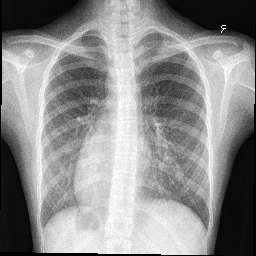

In [19]:
array_to_img(flipped)

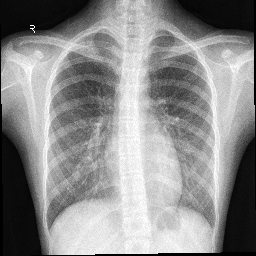

In [20]:
array_to_img(train_images[10])